### Midterm Activity 2
Principal Component Analysis (PCA) <br>
Due Date: June 21, 2025

Objectives:
1. Apply Principal Component Analysis (PCA) as a method to reduce features of a high
dimensional dataset.
2. Discuss the benefits of using PCA.

##### Exploring PCA

Datasets:
● ecommercedata.csv
● surveydata.csv
● picdata.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler

# Load datasets
df2 = pd.read_csv('../data/surveydata.csv')
ecom = pd.read_csv("../data/ecommercedata.csv")
fash = pd.read_csv("../data/picdata.csv")

#get a glimpse of the dataset
df2.head()

,Respondent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8a,Q8b,...,Q20,Q21,Q22,Q23,Q24,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1,Increasing pay,Full Time,3.0,Additional funding for Counselling,No,1,No,1,3,...,4,More women in leadership positions,Yes,East,15.0,NaN,NaN,NaN,NaN,NaN
1,2,Improve benefits,Full Time,1.0,Drug coverage,Yes,3,Yes,3,4,...,4,NaN,No,North,2.0,NaN,NaN,NaN,NaN,NaN
2,3,Job security,Part Time,NaN,NaN,No,1,No,3,1,...,5,NaN,No,North,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Job security,Part Time,NaN,NaN,I don't know,4,No,3,2,...,4,NaN,Yes,East,1.0,NaN,NaN,NaN,NaN,NaN
4,5,Improve working conditions,Full Time,3.0,Wellness account,Yes,3,No,2,3,...,2,Visible minorities are not given same project ...,Prefer not to answer,South,6.0,NaN,NaN,NaN,NaN,NaN


In [4]:
#get a glimpse of the dataset
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
#get a glimpse of the dataset
fash.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [6]:
#basic descriptive statistics - for checking
#you may do this or not
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


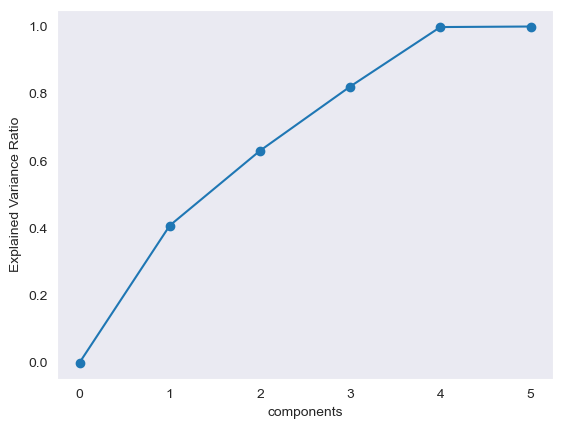

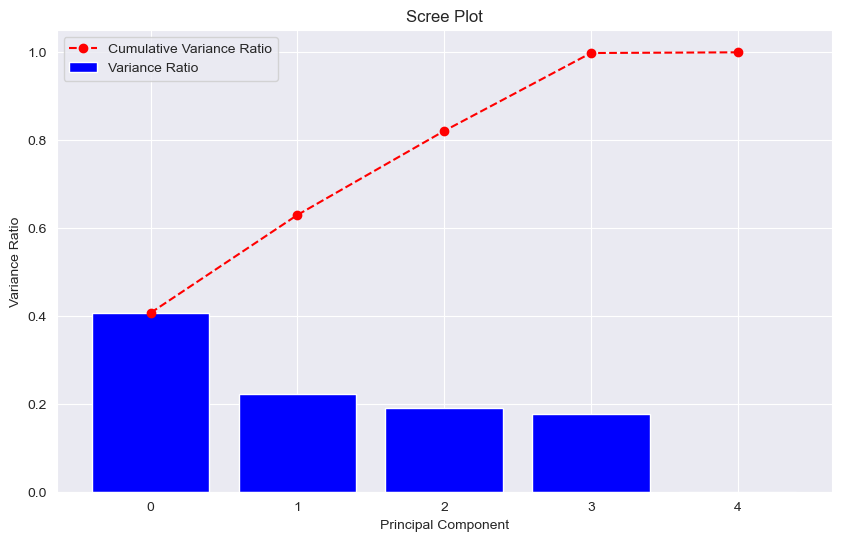

In [7]:
## Principal Component Analysis (PCA)
#starting with ecommerce data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#filter dataset and standardize
ecom = ecom[ecom.columns[3:]]
scaler = StandardScaler()
scale_data = scaler.fit_transform(ecom)
#just for starter (can be changed later)
#we get the PCA - with 4 components
#this can change depending on the threshold established at the start of the analysis
#n_components can vary
pca = PCA(n_components=4)
pca.fit_transform(scale_data)
#we get the sum of the explained variance ratio to determine if the
#n_compoents used in PCA is sufficient to consider threshold
vr = sum(pca.explained_variance_ratio_)

vr
#establish the data points for the plots
#get the range to consider - n_components to be used plotting the graph
#to show explained variance ratio of each component - cumulative
#range is 0 to 5 not including 6 - exclusive
nums = range(0, 5+1)
#array to store total variance ratio per component
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
#plot the computed variance ratio per component
import matplotlib.pyplot as plt
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()
#analyze the graph
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
    label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()
scree_plot(pca)

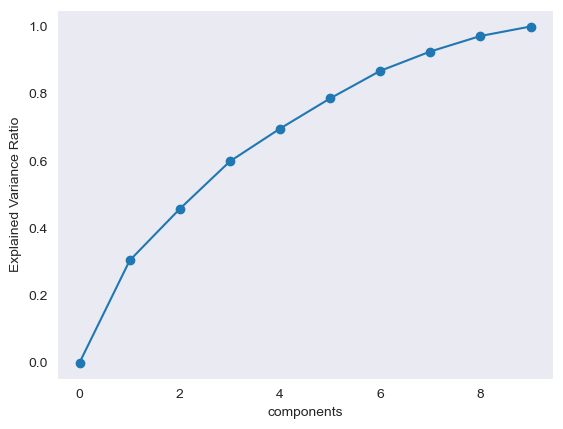

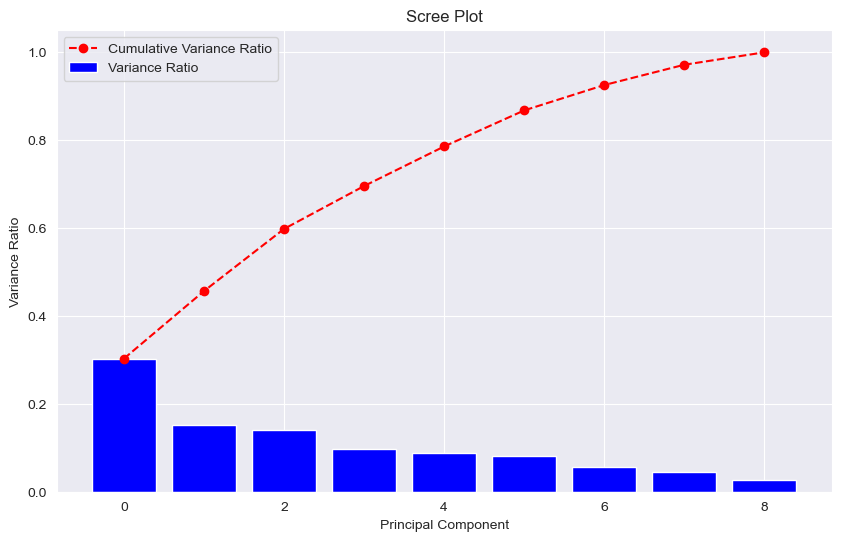

In [8]:
#using the survey data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df2.head()

#for sample purposes - choose any column
df_likert = df2[["Q6", "Q10", "Q11", "Q12", "Q13", "Q14", "Q15", "Q18", "Q20"]].copy()
#remove missing values
df_likert = df_likert.dropna()
#standardize data
scaler = StandardScaler()
scale_data = scaler.fit_transform(df_likert)
#range is 0 to 5 not including 6 - exclusive
nums = range(0, 9+1)
var_ratio = []
for num in nums:
    pca = PCA(n_components=num)
    pca.fit(scale_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
#plot the computed variance ratio per component
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()
#analyze result
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    indices = np.arange(num_components)
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(variance_ratio)
    plt.figure(figsize=(10, 6))
    plt.bar(indices, variance_ratio, color='blue', label='Variance Ratio')
    plt.plot(indices, cumulative_variance_ratio, marker='o', color='red', linestyle='--',
    label='Cumulative Variance Ratio')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio')
    plt.title('Scree Plot')
    plt.legend()
    plt.show()
scree_plot(pca)

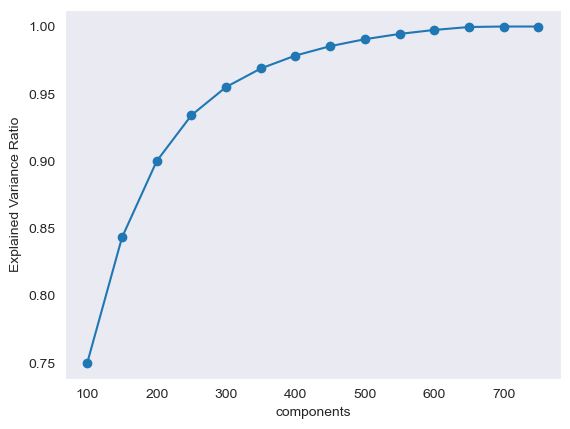

In [32]:
#picdataset
#to show the use of PCA using a large dataset
x = fash.iloc[:, :784]

y = fash.iloc[:, -1]
#dataset representing an image where each pixel represent the matrix (10000rowsx785 columns)
#numbers 1 to 254 representing how dark is the color of the pixel
x = x[:10000]
x
#large dataset using incremental PCA
#or regular PCA - for discussion purposes
#add data in batches to manage efficiently
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

scaler = StandardScaler()
scale_data = scaler.fit_transform(x)

#range of numbers starting from 100, ending at 784 (inclusive), with a step size of 50.
#sequence will start at 100, increment by 50 for each subsequent number, and stop before or at 785.
batch_size = None
nums = range(100, 784+1, 50)
var_ratio = []
for num in nums:
    ipca = IncrementalPCA(n_components=num, batch_size=batch_size)
    ipca.fit(scale_data)
    var_ratio.append(np.sum(ipca.explained_variance_ratio_))
    
plt.plot(nums, var_ratio, marker='o')
plt.xlabel('components')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

ipca = IncrementalPCA(n_components=200)
x_new = ipca.fit_transform(scale_data)

##### Classification Model Development
Using the same dataset (glass.csv) from the previous activity, classify the dataset using the minimum <br>
number of principal components having at least 90% representation of the dataset.<br> Present the performance of the model with complete attributes and with the chosen components.

1. Data exploration and preprocessing
<br> - Data cleaning, data transformation and other data
preprocessing techniques as deemed necessary

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
glass_df = pd.read_csv('../data/glass.csv')
print("Original dataset shape:", glass_df.shape)

# Check for missing values
print("\nMissing values per column:")
print(glass_df.isnull().sum())

# Drop idno column and separate features/target
x = glass_df.drop(['idno', 'type'], axis=1)
y = glass_df['type']
print("\nFeatures shape:", x.shape, "Target shape:", y.shape)

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


Original dataset shape: (214, 11)

Missing values per column:
idno    0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64

Features shape: (214, 9) Target shape: (214,)


2. Model Development
    <br> - For the model development, compare the performance of the classification model with all
features/attributes and with a reduced dataset using PCA.


Minimum components for 90% variance: 6


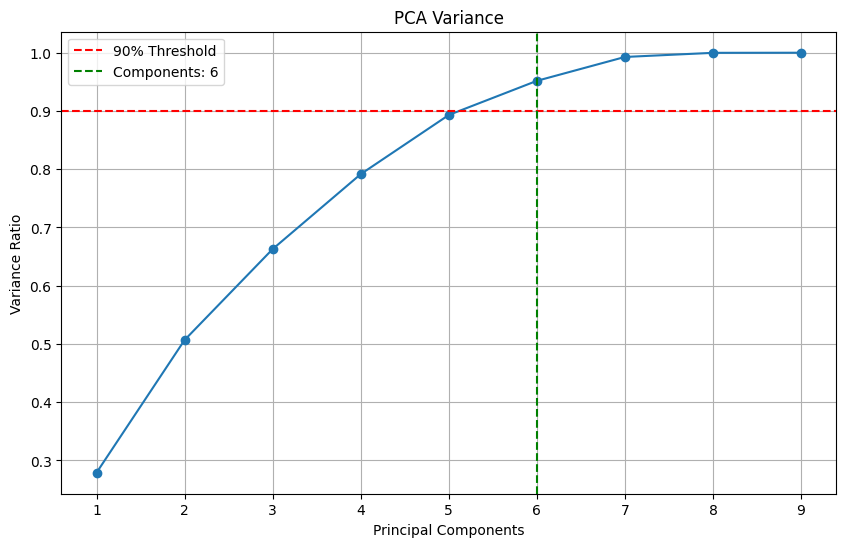

In [ ]:
# PCA Exploration
pca_full = PCA()
pca_full.fit(x_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find minimal components for ≥90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nMinimum components for 90% variance: {n_components}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axvline(x=n_components, color='g', linestyle='--', label=f'Components: {n_components}')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('PCA Variance')
plt.legend()
plt.grid()
plt.savefig('pca_variance.png')
plt.show()

# Split data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

# Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Model 1 All Features
rf_all = rf.fit(x_train, y_train)
y_pred_all = rf_all.predict(x_test)

# Model 2 PCA Features
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
rf_pca = rf.fit(x_train_pca, y_train)
y_pred_pca = rf_pca.predict(x_test_pca)




3. Model Evaluation
<br>
● Use the appropriate performance metrics to evaluate the developed models. <br>
● To assess the constructed model's performance, use 8-fold cross validation with a 80%–20%
split between training and test data.

In [ ]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress specific warnings that are not related
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# 8-Fold Cross-Validation (80-20 split equivalent)
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# Evaluate models using cross-validation
def evaluate_model(model, X_data, y_data):
    metrics = {
        'Accuracy': cross_val_score(model, X_data, y_data, cv=kfold, scoring='accuracy'),
        'Precision': cross_val_score(model, X_data, y_data, cv=kfold, scoring='precision_weighted'),
        'Recall': cross_val_score(model, X_data, y_data, cv=kfold, scoring='recall_weighted'),
        'F1-Score': cross_val_score(model, X_data, y_data, cv=kfold, scoring='f1_weighted')
    }
    return {k: np.mean(v) for k, v in metrics.items()}

# Get performance metrics
metrics_all = evaluate_model(rf, x_scaled, y)
metrics_pca = evaluate_model(rf, pca.transform(x_scaled), y)

# Display performance metrics
results_df = pd.DataFrame({
    'Attributes/Features': ['All Attributes', f'PCA ({n_components} Components)'],
    'Accuracy': [metrics_all['Accuracy'], metrics_pca['Accuracy']],
    'Precision': [metrics_all['Precision'], metrics_pca['Precision']],
    'Recall': [metrics_all['Recall'], metrics_pca['Recall']],
    'F1-Score': [metrics_all['F1-Score'], metrics_pca['F1-Score']]
})
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
  Attributes/Features  Accuracy  Precision    Recall  F1-Score
0      All Attributes  0.794160   0.777249  0.794160  0.774300
1  PCA (6 Components)  0.714566   0.653268  0.714566  0.676357
